In [1]:
import os
import math
import gc

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

%matplotlib inline

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
df = pd.read_csv('../data/processed_data_3.2.csv')

In [4]:
train_df = df[df['TARGET'].notnull()]
test_df = df[df['TARGET'].isnull()]

In [5]:
def summarise_data(df):
    df_summary = df.describe(include = "all").transpose()
    
    #Overwrite the descibe unique count as it ignore integer/float types.
    df_summary['unique'] = df.T.apply(lambda x: x.nunique(), axis=1)
    #Create a missing %
    df_summary['missing'] = 1 - df_summary['count']/len(df)
    
    #get column data type
    df_summary['dtype'] = df.dtypes
    
    #get the column names and reset index
    df_summary['col'] = df_summary.index
    df_summary = df_summary.reset_index(drop = True)

    #Sort the summary table
    df_summary = df_summary.sort_values(by=['dtype', 'unique','col','missing'])
    
#     col_order = ['col','dtype','unique','count','missing','top','freq','mean','std','min','25%','50%','75%','max']
    col_order = ['col','dtype','unique','count','missing','mean','std','min','25%','50%','75%','max']
    
    return(df_summary[col_order])
    #return(df_summary)

In [6]:
#Set this option to show the greatest number of columns in the data. 
pd.set_option('display.max_columns', 661)
pd.set_option('display.max_rows', 661)
pd.set_option('display.precision', 2)
pd.options.display.float_format = '{:.2f}'.format

In [7]:
train_sum = summarise_data(train_df).sort_values('col')

/anaconda3/envs/home-credit/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


In [8]:
test_sum = summarise_data(test_df).sort_values('col')

/anaconda3/envs/home-credit/lib/python3.6/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


In [9]:
test_df['BURO_MONTHS_BALANCE_MAX_MAX'].value_counts()/len(test_df)

0.00    0.86
-1.00   0.01
-2.00   0.00
Name: BURO_MONTHS_BALANCE_MAX_MAX, dtype: float64

In [10]:
train_df['BURO_MONTHS_BALANCE_MAX_MAX'].value_counts()/len(train_df)

0.00     0.29
-1.00    0.00
-2.00    0.00
-4.00    0.00
-3.00    0.00
-6.00    0.00
-8.00    0.00
-5.00    0.00
-7.00    0.00
-10.00   0.00
-9.00    0.00
-12.00   0.00
-13.00   0.00
-11.00   0.00
-14.00   0.00
-15.00   0.00
-19.00   0.00
-16.00   0.00
-18.00   0.00
-17.00   0.00
-22.00   0.00
-21.00   0.00
-24.00   0.00
-23.00   0.00
-25.00   0.00
-20.00   0.00
-26.00   0.00
-28.00   0.00
-29.00   0.00
-27.00   0.00
-31.00   0.00
-38.00   0.00
-33.00   0.00
-34.00   0.00
-32.00   0.00
-30.00   0.00
-37.00   0.00
-45.00   0.00
-36.00   0.00
-35.00   0.00
-46.00   0.00
-40.00   0.00
-43.00   0.00
-42.00   0.00
-39.00   0.00
-47.00   0.00
-64.00   0.00
-62.00   0.00
-50.00   0.00
-66.00   0.00
-48.00   0.00
-51.00   0.00
-71.00   0.00
-41.00   0.00
-67.00   0.00
-56.00   0.00
-69.00   0.00
-49.00   0.00
-57.00   0.00
-65.00   0.00
-58.00   0.00
-70.00   0.00
-60.00   0.00
-52.00   0.00
-53.00   0.00
-63.00   0.00
-44.00   0.00
-82.00   0.00
-54.00   0.00
-55.00   0.00
-61.00   0.00
-76.00

In [11]:
train_df[train_df['BURO_MONTHS_BALANCE_MAX_MAX'] == 0]['TARGET'].value_counts()/len(train_df)

0.00   0.26
1.00   0.02
Name: TARGET, dtype: float64

In [12]:
list(test_df.columns)

['Unnamed: 0',
 'AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'AMT_INCOME_TOTAL',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'APARTMENTS_AVG',
 'APARTMENTS_MEDI',
 'APARTMENTS_MODE',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_MODE',
 'CNT_CHILDREN',
 'CNT_FAM_MEMBERS',
 'CODE_GENDER',
 'COMMONAREA_AVG',
 'COMMONAREA_MEDI',
 'COMMONAREA_MODE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_REGISTRATION',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'ELEVATORS_AVG',
 'ELEVATORS_MEDI',
 'ELEVATORS_MODE',
 'EMERGENCYSTATE_MODE',
 'ENTRANCES_AVG',
 'ENTRANCES_MEDI',
 'ENTRANCES_MODE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_8',
 'FLAG_EMAIL',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FL

In [14]:
def missing_values(DataFrame):
    print('The following features are missing values: \n')
    for column in DataFrame.columns:
#         if DataFrame[column].isna().value_counts()[0] < len(DataFrame):
        no_missing = (np.shape(DataFrame)[0] - DataFrame[column].isna().value_counts()[0])/np.shape(DataFrame)[0]
        print('{} missing value counts: {:.2f}% of column missing'.format(column, no_missing*100))

In [15]:
test_df = test_df.drop('TARGET', axis=1)

In [16]:
missing_values(test_df)

The following features are missing values: 

Unnamed: 0 missing value counts: 0.00% of column missing
AMT_ANNUITY missing value counts: 0.05% of column missing
AMT_CREDIT missing value counts: 0.00% of column missing
AMT_GOODS_PRICE missing value counts: 0.00% of column missing
AMT_INCOME_TOTAL missing value counts: 0.00% of column missing
AMT_REQ_CREDIT_BUREAU_DAY missing value counts: 12.41% of column missing
AMT_REQ_CREDIT_BUREAU_MON missing value counts: 12.41% of column missing
AMT_REQ_CREDIT_BUREAU_QRT missing value counts: 12.41% of column missing
AMT_REQ_CREDIT_BUREAU_WEEK missing value counts: 12.41% of column missing
AMT_REQ_CREDIT_BUREAU_YEAR missing value counts: 12.41% of column missing
APARTMENTS_AVG missing value counts: 49.01% of column missing
APARTMENTS_MEDI missing value counts: 49.01% of column missing
APARTMENTS_MODE missing value counts: 49.01% of column missing
BASEMENTAREA_AVG missing value counts: 56.71% of column missing
BASEMENTAREA_MEDI missing value counts:

CLOSED_AMT_CREDIT_SUM_MEAN missing value counts: 22.53% of column missing
CLOSED_AMT_CREDIT_SUM_DEBT_MIN missing value counts: 26.14% of column missing
CLOSED_AMT_CREDIT_SUM_DEBT_MAX missing value counts: 26.14% of column missing
CLOSED_AMT_CREDIT_SUM_DEBT_MEAN missing value counts: 26.14% of column missing
CLOSED_AMT_CREDIT_SUM_LIMIT_SUM missing value counts: 22.53% of column missing
CLOSED_AMT_CREDIT_SUM_LIMIT_MEAN missing value counts: 36.47% of column missing
CLOSED_DAYS_CREDIT_UPDATE_MIN missing value counts: 22.53% of column missing
CLOSED_DAYS_CREDIT_UPDATE_MAX missing value counts: 22.53% of column missing
CLOSED_DAYS_CREDIT_UPDATE_MEAN missing value counts: 22.53% of column missing
CLOSED_AMT_ANNUITY_MAX missing value counts: 40.12% of column missing
CLOSED_AMT_ANNUITY_MEAN missing value counts: 40.12% of column missing
CLOSED_MONTHS_BALANCE_MIN_MIN missing value counts: 22.53% of column missing
CLOSED_MONTHS_BALANCE_MAX_MAX missing value counts: 22.53% of column missing
CLOSE

CC_AMT_RECIVABLE_MAX missing value counts: 65.84% of column missing
CC_AMT_RECIVABLE_MEAN missing value counts: 65.84% of column missing
CC_AMT_RECIVABLE_SUM missing value counts: 65.84% of column missing
CC_AMT_RECIVABLE_VAR missing value counts: 65.96% of column missing
CC_AMT_TOTAL_RECEIVABLE_MIN missing value counts: 65.84% of column missing
CC_AMT_TOTAL_RECEIVABLE_MAX missing value counts: 65.84% of column missing
CC_AMT_TOTAL_RECEIVABLE_MEAN missing value counts: 65.84% of column missing
CC_AMT_TOTAL_RECEIVABLE_SUM missing value counts: 65.84% of column missing
CC_AMT_TOTAL_RECEIVABLE_VAR missing value counts: 65.96% of column missing
CC_CNT_DRAWINGS_ATM_CURRENT_MAX missing value counts: 77.32% of column missing
CC_CNT_DRAWINGS_ATM_CURRENT_MEAN missing value counts: 77.32% of column missing
CC_CNT_DRAWINGS_ATM_CURRENT_SUM missing value counts: 65.84% of column missing
CC_CNT_DRAWINGS_ATM_CURRENT_VAR missing value counts: 77.44% of column missing
CC_CNT_DRAWINGS_CURRENT_MIN missin

PREV_WEEKDAY_APPR_PROCESS_START_SUNDAY_MEAN missing value counts: 1.94% of column missing
PREV_WEEKDAY_APPR_PROCESS_START_THURSDAY_MEAN missing value counts: 1.94% of column missing
PREV_WEEKDAY_APPR_PROCESS_START_TUESDAY_MEAN missing value counts: 1.94% of column missing
PREV_WEEKDAY_APPR_PROCESS_START_WEDNESDAY_MEAN missing value counts: 1.94% of column missing
PREV_FLAG_LAST_APPL_PER_CONTRACT_N_MEAN missing value counts: 1.94% of column missing
PREV_NAME_CASH_LOAN_PURPOSE_Buying a used car_MEAN missing value counts: 1.94% of column missing
PREV_NAME_CASH_LOAN_PURPOSE_Car repairs_MEAN missing value counts: 1.94% of column missing
PREV_NAME_CASH_LOAN_PURPOSE_Everyday expenses_MEAN missing value counts: 1.94% of column missing
PREV_NAME_CASH_LOAN_PURPOSE_Medicine_MEAN missing value counts: 1.94% of column missing
PREV_NAME_CASH_LOAN_PURPOSE_Other_MEAN missing value counts: 1.94% of column missing
PREV_NAME_CASH_LOAN_PURPOSE_Repairs_MEAN missing value counts: 1.94% of column missing
PRE

REFUSED_AMT_CREDIT_MEAN missing value counts: 63.11% of column missing
REFUSED_APP_CREDIT_PERC_MIN missing value counts: 64.93% of column missing
REFUSED_APP_CREDIT_PERC_MAX missing value counts: 64.93% of column missing
REFUSED_APP_CREDIT_PERC_MEAN missing value counts: 64.93% of column missing
REFUSED_APP_CREDIT_PERC_VAR missing value counts: 81.41% of column missing
REFUSED_AMT_DOWN_PAYMENT_MIN missing value counts: 84.75% of column missing
REFUSED_AMT_DOWN_PAYMENT_MAX missing value counts: 84.75% of column missing
REFUSED_AMT_DOWN_PAYMENT_MEAN missing value counts: 84.75% of column missing
REFUSED_AMT_GOODS_PRICE_MIN missing value counts: 65.52% of column missing
REFUSED_AMT_GOODS_PRICE_MAX missing value counts: 65.52% of column missing
REFUSED_AMT_GOODS_PRICE_MEAN missing value counts: 65.52% of column missing
REFUSED_HOUR_APPR_PROCESS_START_MIN missing value counts: 63.11% of column missing
REFUSED_HOUR_APPR_PROCESS_START_MAX missing value counts: 63.11% of column missing
REFUSED

In [17]:
test_df.iloc[:,149:284].head()

,BURO_DAYS_CREDIT_ENDDATE_MIN,BURO_DAYS_CREDIT_ENDDATE_MAX,BURO_DAYS_CREDIT_ENDDATE_MEAN,BURO_DAYS_ENDDATE_FACT_MEAN,BURO_AMT_CREDIT_MAX_OVERDUE_MEAN,BURO_CNT_CREDIT_PROLONG_COUNT,BURO_CNT_CREDIT_PROLONG_SUM,BURO_AMT_CREDIT_SUM_MIN,BURO_AMT_CREDIT_SUM_MAX,BURO_AMT_CREDIT_SUM_MEAN,BURO_AMT_CREDIT_SUM_DEBT_MIN,BURO_AMT_CREDIT_SUM_DEBT_MAX,BURO_AMT_CREDIT_SUM_DEBT_MEAN,BURO_AMT_CREDIT_SUM_LIMIT_SUM,BURO_AMT_CREDIT_SUM_LIMIT_MEAN,BURO_AMT_CREDIT_SUM_OVERDUE_MEAN,BURO_DAYS_CREDIT_UPDATE_MIN,BURO_DAYS_CREDIT_UPDATE_MAX,BURO_DAYS_CREDIT_UPDATE_MEAN,BURO_AMT_ANNUITY_MAX,BURO_AMT_ANNUITY_MEAN,BURO_MONTHS_BALANCE_MIN_MIN,BURO_MONTHS_BALANCE_MAX_MAX,BURO_MONTHS_BALANCE_SIZE_MEAN,BURO_MONTHS_BALANCE_SIZE_SUM,BURO_CREDIT_ACTIVE_Active_MEAN,BURO_CREDIT_ACTIVE_Closed_MEAN,BURO_CREDIT_ACTIVE_Sold_MEAN,BURO_CREDIT_TYPE_Car loan_MEAN,BURO_CREDIT_TYPE_Consumer credit_MEAN,BURO_CREDIT_TYPE_Credit card_MEAN,BURO_CREDIT_TYPE_Loan for business development_MEAN,BURO_CREDIT_TYPE_Microloan_MEAN,BURO_CREDIT_TYPE_Mortgage_MEAN,ACTIVE_DAYS_CREDIT_MIN,ACTIVE_DAYS_CREDIT_MAX,ACTIVE_DAYS_CREDIT_MEAN,ACTIVE_DAYS_CREDIT_VAR,ACTIVE_CREDIT_DAY_OVERDUE_MAX,ACTIVE_DAYS_CREDIT_ENDDATE_MIN,ACTIVE_DAYS_CREDIT_ENDDATE_MAX,ACTIVE_DAYS_CREDIT_ENDDATE_MEAN,ACTIVE_DAYS_ENDDATE_FACT_MEAN,ACTIVE_AMT_CREDIT_MAX_OVERDUE_MEAN,ACTIVE_CNT_CREDIT_PROLONG_COUNT,ACTIVE_CNT_CREDIT_PROLONG_SUM,ACTIVE_AMT_CREDIT_SUM_MIN,ACTIVE_AMT_CREDIT_SUM_MAX,ACTIVE_AMT_CREDIT_SUM_MEAN,ACTIVE_AMT_CREDIT_SUM_DEBT_MIN,ACTIVE_AMT_CREDIT_SUM_DEBT_MAX,ACTIVE_AMT_CREDIT_SUM_DEBT_MEAN,ACTIVE_AMT_CREDIT_SUM_LIMIT_SUM,ACTIVE_AMT_CREDIT_SUM_LIMIT_MEAN,ACTIVE_AMT_CREDIT_SUM_OVERDUE_MEAN,ACTIVE_DAYS_CREDIT_UPDATE_MIN,ACTIVE_DAYS_CREDIT_UPDATE_MAX,ACTIVE_DAYS_CREDIT_UPDATE_MEAN,ACTIVE_AMT_ANNUITY_MAX,ACTIVE_AMT_ANNUITY_MEAN,ACTIVE_MONTHS_BALANCE_MIN_MIN,ACTIVE_MONTHS_BALANCE_MAX_MAX,ACTIVE_MONTHS_BALANCE_SIZE_MEAN,ACTIVE_MONTHS_BALANCE_SIZE_SUM,ACTIVE_CREDIT_TYPE_Car loan_MEAN,ACTIVE_CREDIT_TYPE_Consumer credit_MEAN,ACTIVE_CREDIT_TYPE_Credit card_MEAN,ACTIVE_CREDIT_TYPE_Microloan_MEAN,ACTIVE_CREDIT_TYPE_Mortgage_MEAN,CLOSED_DAYS_CREDIT_MIN,CLOSED_DAYS_CREDIT_MAX,CLOSED_DAYS_CREDIT_MEAN,CLOSED_DAYS_CREDIT_VAR,CLOSED_DAYS_CREDIT_ENDDATE_MIN,CLOSED_DAYS_CREDIT_ENDDATE_MAX,CLOSED_DAYS_CREDIT_ENDDATE_MEAN,CLOSED_DAYS_ENDDATE_FACT_MEAN,CLOSED_AMT_CREDIT_MAX_OVERDUE_MEAN,CLOSED_CNT_CREDIT_PROLONG_COUNT,CLOSED_AMT_CREDIT_SUM_MIN,CLOSED_AMT_CREDIT_SUM_MAX,CLOSED_AMT_CREDIT_SUM_MEAN,CLOSED_AMT_CREDIT_SUM_DEBT_MIN,CLOSED_AMT_CREDIT_SUM_DEBT_MAX,CLOSED_AMT_CREDIT_SUM_DEBT_MEAN,CLOSED_AMT_CREDIT_SUM_LIMIT_SUM,CLOSED_AMT_CREDIT_SUM_LIMIT_MEAN,CLOSED_DAYS_CREDIT_UPDATE_MIN,CLOSED_DAYS_CREDIT_UPDATE_MAX,CLOSED_DAYS_CREDIT_UPDATE_MEAN,CLOSED_AMT_ANNUITY_MAX,CLOSED_AMT_ANNUITY_MEAN,CLOSED_MONTHS_BALANCE_MIN_MIN,CLOSED_MONTHS_BALANCE_MAX_MAX,CLOSED_MONTHS_BALANCE_SIZE_MEAN,CLOSED_MONTHS_BALANCE_SIZE_SUM,CLOSED_CREDIT_TYPE_Car loan_MEAN,CLOSED_CREDIT_TYPE_Consumer credit_MEAN,CLOSED_CREDIT_TYPE_Credit card_MEAN,CLOSED_CREDIT_TYPE_Loan for business development_MEAN,CLOSED_CREDIT_TYPE_Microloan_MEAN,CLOSED_CREDIT_TYPE_Mortgage_MEAN,NEW_RATIO_BURO_DAYS_CREDIT_MIN,NEW_RATIO_BURO_DAYS_CREDIT_MAX,NEW_RATIO_BURO_DAYS_CREDIT_MEAN,NEW_RATIO_BURO_DAYS_CREDIT_VAR,NEW_RATIO_BURO_DAYS_CREDIT_ENDDATE_MIN,NEW_RATIO_BURO_DAYS_CREDIT_ENDDATE_MAX,NEW_RATIO_BURO_DAYS_CREDIT_ENDDATE_MEAN,NEW_RATIO_BURO_DAYS_ENDDATE_FACT_MEAN,NEW_RATIO_BURO_AMT_CREDIT_MAX_OVERDUE_MEAN,NEW_RATIO_BURO_CNT_CREDIT_PROLONG_COUNT,NEW_RATIO_BURO_CNT_CREDIT_PROLONG_SUM,NEW_RATIO_BURO_AMT_CREDIT_SUM_MIN,NEW_RATIO_BURO_AMT_CREDIT_SUM_MAX,NEW_RATIO_BURO_AMT_CREDIT_SUM_MEAN,NEW_RATIO_BURO_AMT_CREDIT_SUM_DEBT_MIN,NEW_RATIO_BURO_AMT_CREDIT_SUM_DEBT_MAX,NEW_RATIO_BURO_AMT_CREDIT_SUM_DEBT_MEAN,NEW_RATIO_BURO_AMT_CREDIT_SUM_LIMIT_SUM,NEW_RATIO_BURO_AMT_CREDIT_SUM_LIMIT_MEAN,NEW_RATIO_BURO_DAYS_CREDIT_UPDATE_MIN,NEW_RATIO_BURO_DAYS_CREDIT_UPDATE_MAX,NEW_RATIO_BURO_DAYS_CREDIT_UPDATE_MEAN,NEW_RATIO_BURO_AMT_ANNUITY_MAX,NEW_RATIO_BURO_AMT_ANNUITY_MEAN,NEW_RATIO_BURO_MONTHS_BALANCE_MIN_MI

In [18]:
def compare_train_feature_with_test(feature):
    print('Looking at percentage of values in test set:')
    print('\n')
    print(test_df[feature].value_counts()/len(test_df))
    print('\n')
    print('Looking at percentage of values in train set:')
    print('\n')
    print(train_df[feature].value_counts()/len(train_df))
    print('\n')
    print('Looking at value counts in train where feature == 0:')
    print('\n')
    print(train_df[train_df[feature] == 0]['TARGET'].value_counts()/len(train_df))
    

In [19]:
compare_train_feature_with_test('NEW_RATIO_BURO_CREDIT_TYPE_Car loan_MEAN')

Looking at percentage of values in test set:


0.00    0.03
inf     0.02
1.00    0.00
2.00    0.00
3.00    0.00
1.50    0.00
2.50    0.00
0.67    0.00
0.50    0.00
2.33    0.00
1.67    0.00
1.33    0.00
4.00    0.00
2.67    0.00
7.00    0.00
0.83    0.00
3.50    0.00
0.75    0.00
3.33    0.00
1.25    0.00
6.00    0.00
0.80    0.00
0.33    0.00
0.62    0.00
4.33    0.00
0.60    0.00
2.25    0.00
4.50    0.00
2.40    0.00
10.00   0.00
2.17    0.00
0.25    0.00
9.00    0.00
1.75    0.00
2.20    0.00
5.50    0.00
0.86    0.00
1.60    0.00
0.40    0.00
5.00    0.00
0.30    0.00
1.90    0.00
11.00   0.00
1.10    0.00
3.67    0.00
2.60    0.00
3.20    0.00
0.78    0.00
1.22    0.00
3.75    0.00
1.42    0.00
1.83    0.00
1.29    0.00
0.20    0.00
0.36    0.00
1.86    0.00
2.29    0.00
2.12    0.00
0.58    0.00
4.67    0.00
0.56    0.00
1.17    0.00
6.50    0.00
0.42    0.00
2.75    0.00
1.14    0.00
0.83    0.00
6.67    0.00
0.71    0.00
0.14    0.00
0.32    0.00
Name: NEW_RATIO_BURO_CREDIT_TY

In [20]:
compare_train_feature_with_test('NEW_RATIO_PREV_RATE_DOWN_PAYMENT_MIN')

Looking at percentage of values in test set:


0.00       0.03
inf        0.02
1.00       0.00
0.50       0.00
2.00       0.00
0.88       0.00
1.00       0.00
0.90       0.00
0.91       0.00
0.92       0.00
0.92       0.00
1.56       0.00
0.49       0.00
2.02       0.00
1.07       0.00
0.27       0.00
1.87       0.00
0.99       0.00
0.00       0.00
1.77       0.00
0.61       0.00
2.32       0.00
0.96       0.00
1.00       0.00
0.60       0.00
1.44       0.00
0.17       0.00
1.00       0.00
0.92       0.00
1.87       0.00
1.00       0.00
0.29       0.00
1.41       0.00
0.73       0.00
1.54       0.00
1.00       0.00
0.21       0.00
3411.69    0.00
0.92       0.00
1.00       0.00
1.01       0.00
0.52       0.00
0.15       0.00
0.44       0.00
0.45       0.00
0.93       0.00
1.00       0.00
1.09       0.00
0.35       0.00
1.05       0.00
0.93       0.00
0.33       0.00
0.97       0.00
2.70       0.00
0.96       0.00
0.87       0.00
0.98       0.00
0.60       0.00
0.00       0.00
0.99     

0.00   0.03
1.00   0.00
Name: TARGET, dtype: float64


In [21]:
compare_train_feature_with_test('NEW_RATIO_BURO_AMT_CREDIT_MAX_OVERDUE_MEAN')

Looking at percentage of values in test set:


0.00         0.04
inf          0.04
1.87         0.00
0.73         0.00
1.63         0.00
0.13         0.00
0.00         0.00
0.13         0.00
1.85         0.00
8.06         0.00
2.83         0.00
8.48         0.00
10.96        0.00
1.41         0.00
0.97         0.00
9.36         0.00
0.23         0.00
0.53         0.00
236.09       0.00
0.30         0.00
2.59         0.00
2.42         0.00
2.02         0.00
0.19         0.00
16.31        0.00
16.32        0.00
0.36         0.00
6.25         0.00
44.63        0.00
0.90         0.00
0.36         0.00
9.51         0.00
0.42         0.00
0.04         0.00
0.68         0.00
0.35         0.00
4.00         0.00
0.85         0.00
2.92         0.00
1.84         0.00
1.10         0.00
0.11         0.00
3.35         0.00
1.54         0.00
0.25         0.00
1.04         0.00
12.76        0.00
1.83         0.00
4.99         0.00
4.30         0.00
0.12         0.00
40.74        0.00
2.08         0.00

0.00   0.06
1.00   0.00
Name: TARGET, dtype: float64


In [22]:
compare_train_feature_with_test('NEW_RATIO_PREV_AMT_DOWN_PAYMENT_MIN')

Looking at percentage of values in test set:


0.00       0.03
inf        0.02
1.00       0.00
0.50       0.00
2.00       0.00
0.67       0.00
0.62       0.00
3.33       0.00
1.43       0.00
1.25       0.00
0.40       0.00
0.80       0.00
0.71       0.00
0.83       0.00
0.12       0.00
0.42       0.00
0.90       0.00
2000.00    0.00
0.91       0.00
3.00       0.00
1.67       0.00
4.00       0.00
1.30       0.00
0.25       0.00
0.23       0.00
1.87       0.00
0.18       0.00
0.43       0.00
0.24       0.00
1.29       0.00
6.70       0.00
0.78       0.00
0.44       0.00
0.44       0.00
3.14       0.00
1.05       0.00
0.43       0.00
0.11       0.00
0.64       0.00
1.90       0.00
0.37       0.00
0.62       0.00
0.07       0.00
0.44       0.00
783.51     0.00
3396.97    0.00
2.05       0.00
0.99       0.00
0.18       0.00
0.23       0.00
1.76       0.00
0.00       0.00
1.14       0.00
0.13       0.00
0.77       0.00
0.40       0.00
0.58       0.00
0.88       0.00
0.23       0.00
0.17     

In [23]:
compare_train_feature_with_test('FLAG_DOCUMENT_3')

Looking at percentage of values in test set:


0   0.79
1   0.21
Name: FLAG_DOCUMENT_3, dtype: float64


Looking at percentage of values in train set:


0   0.71
1   0.29
Name: FLAG_DOCUMENT_3, dtype: float64


Looking at value counts in train where feature == 0:


0.00   0.65
1.00   0.06
Name: TARGET, dtype: float64


In [24]:
compare_train_feature_with_test('FLAG_DOCUMENT_8')

Looking at percentage of values in test set:


0   0.91
1   0.09
Name: FLAG_DOCUMENT_8, dtype: float64


Looking at percentage of values in train set:


0   0.92
1   0.08
Name: FLAG_DOCUMENT_8, dtype: float64


Looking at value counts in train where feature == 0:


0.00   0.84
1.00   0.07
Name: TARGET, dtype: float64


In [25]:
compare_train_feature_with_test('FLAG_DOCUMENT_18')

Looking at percentage of values in test set:


0   1.00
1   0.00
Name: FLAG_DOCUMENT_18, dtype: float64


Looking at percentage of values in train set:


0   0.99
1   0.01
Name: FLAG_DOCUMENT_18, dtype: float64


Looking at value counts in train where feature == 0:


0.00   0.91
1.00   0.08
Name: TARGET, dtype: float64


In [26]:
compare_train_feature_with_test('CODE_GENDER')

Looking at percentage of values in test set:


1   0.67
0   0.33
Name: CODE_GENDER, dtype: float64


Looking at percentage of values in train set:


 1   0.66
 0   0.34
-1   0.00
Name: CODE_GENDER, dtype: float64


Looking at value counts in train where feature == 0:


0.00   0.31
1.00   0.03
Name: TARGET, dtype: float64


In [27]:
print(train_df[train_df['CODE_GENDER'] == 1]['TARGET'].value_counts()/len(train_df))

0.00   0.61
1.00   0.05
Name: TARGET, dtype: float64


In [ ]:
# train_sum

In [ ]:
# test_sum

In [28]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [29]:
def plot_dist(feature):
    
    try:
        sns.distplot(train_df[feature].dropna())
        sns.distplot(test_df[feature].dropna())
    except:
        train_df[feature] = train_df[feature].replace([np.inf, -np.inf], np.nan)
        test_df[feature] = test_df[feature].replace([np.inf, -np.inf], np.nan)
        sns.distplot(train_df[feature].dropna())
        sns.distplot(test_df[feature].dropna())

In [30]:
# for elem in list(train_df.columns):
#     with warnings.catch_warnings():
#         warnings.simplefilter("ignore")
#         plt.figure(figsize = (15,12))
#         plot_dist(elem)

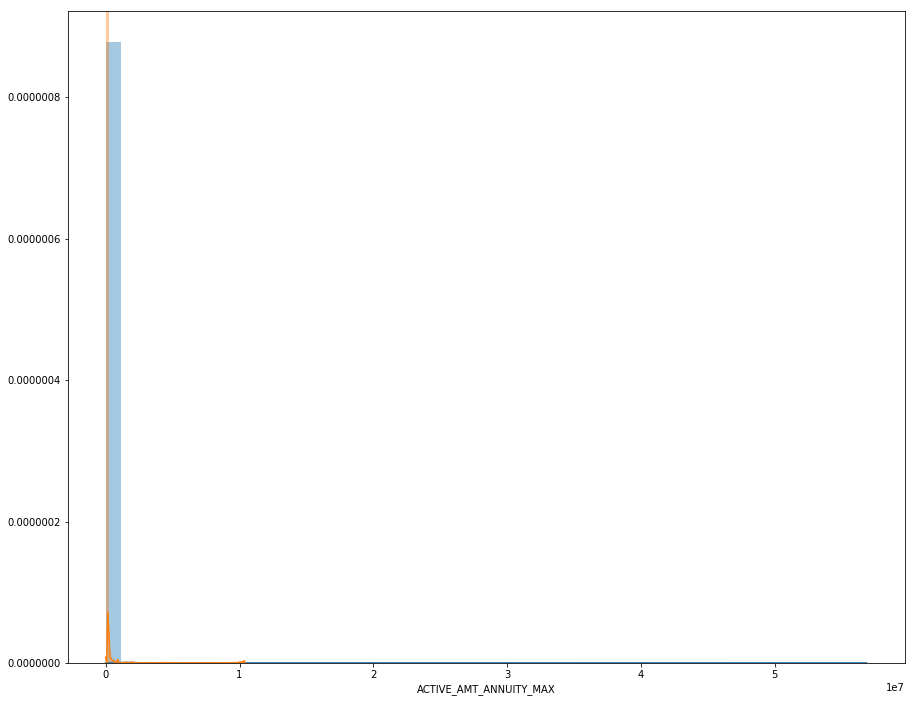

In [31]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    plt.figure(figsize = (15,12))
    plot_dist('ACTIVE_AMT_ANNUITY_MAX')

In [32]:
compare_train_feature_with_test('ACTIVE_AMT_ANNUITY_MAX')

Looking at percentage of values in test set:


0.00         0.05
4500.00      0.01
22500.00     0.01
13500.00     0.00
45000.00     0.00
18000.00     0.00
9000.00      0.00
27000.00     0.00
2700.00      0.00
11250.00     0.00
6750.00      0.00
15750.00     0.00
33750.00     0.00
67500.00     0.00
20250.00     0.00
2250.00      0.00
36000.00     0.00
450.00       0.00
40500.00     0.00
31500.00     0.00
12600.00     0.00
9900.00      0.00
7650.00      0.00
18900.00     0.00
54000.00     0.00
7200.00      0.00
18750.01     0.00
37499.99     0.00
29250.00     0.00
21600.00     0.00
15300.00     0.00
13050.00     0.00
25200.00     0.00
14999.99     0.00
1350.00      0.00
12150.00     0.00
17550.00     0.00
21150.00     0.00
8100.00      0.00
20700.00     0.00
14400.00     0.00
24750.00     0.00
25650.00     0.00
10800.00     0.00
23400.00     0.00
28125.00     0.00
34650.00     0.00
16875.00     0.00
9450.00      0.00
13950.00     0.00
4050.00      0.00
19350.00     0.00
49500.00     0.00

0.00   0.05
1.00   0.00
Name: TARGET, dtype: float64


In [33]:
test_df['NEW_RATIO_PREV_APP_CREDIT_PERC_VAR'].value_counts()

inf                1615
0.00                 94
1.00                  3
0.08                  1
0.67                  1
0.57                  1
1.33                  1
0.04                  1
0.45                  1
1.19                  1
0.64                  1
6.64                  1
4.80                  1
1.01                  1
0.00                  1
1.33                  1
8.64                  1
0.04                  1
0.05                  1
0.22                  1
1.50                  1
0.49                  1
3.79                  1
152.89                1
8.16                  1
15.41                 1
108.88                1
2.88                  1
1.19                  1
1.48                  1
0.47                  1
0.18                  1
1.39                  1
3.74                  1
7.10                  1
0.12                  1
0.61                  1
0.62                  1
3.24                  1
0.20                  1
0.69                  1
0.30            

In [34]:
test_df.head(20)

,Unnamed: 0,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,APARTMENTS_AVG,APARTMENTS_MEDI,APARTMENTS_MODE,BASEMENTAREA_AVG,BASEMENTAREA_MEDI,BASEMENTAREA_MODE,CNT_CHILDREN,CNT_FAM_MEMBERS,CODE_GENDER,COMMONAREA_AVG,COMMONAREA_MEDI,COMMONAREA_MODE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,ELEVATORS_AVG,ELEVATORS_MEDI,ELEVATORS_MODE,EMERGENCYSTATE_MODE,ENTRANCES_AVG,ENTRANCES_MEDI,ENTRANCES_MODE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_11,FLAG_DOCUMENT_18,FLAG_DOCUMENT_3,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_EMAIL,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_PHONE,FLAG_WORK_PHONE,FLOORSMAX_AVG,FLOORSMAX_MEDI,FLOORSMAX_MODE,FLOORSMIN_AVG,FLOORSMIN_MEDI,FLOORSMIN_MODE,FONDKAPREMONT_MODE,HOUR_APPR_PROCESS_START,HOUSETYPE_MODE,LANDAREA_AVG,LANDAREA_MEDI,LANDAREA_MODE,LIVE_CITY_NOT_WORK_CITY,LIVE_REGION_NOT_WORK_REGION,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_MODE,LIVINGAREA_AVG,LIVINGAREA_MEDI,LIVINGAREA_MODE,NAME_CONTRACT_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,NAME_INCOME_TYPE,NAME_TYPE_SUITE,NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_AVG,NONLIVINGAREA_MEDI,NONLIVINGAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,OCCUPATION_TYPE,ORGANIZATION_TYPE,OWN_CAR_AGE,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,REG_REGION_NOT_WORK_REGION,SK_ID_CURR,TOTALAREA_MODE,WALLSMATERIAL_MODE,WEEKDAY_APPR_PROCESS_START,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE,NEW_CREDIT_TO_GOODS_RATIO,NEW_DOC_IND_AVG,NEW_DOC_IND_STD,NEW_DOC_IND_KURT,NEW_LIVE_IND_SUM,NEW_LIVE_IND_STD,NEW_LIVE_IND_KURT,NEW_INC_PER_CHLD,NEW_INC_BY_ORG,NEW_ANNUITY_TO_INCOME_RATIO,NEW_SOURCES_PROD,NEW_EXT_SOURCES_MEAN,NEW_SCORES_STD,NEW_CAR_TO_BIRTH_RATIO,NEW_CAR_TO_EMPLOY_RATIO,NEW_PHONE_TO_BIRTH_RATIO,NEW_PHONE_TO_EMPLOY_RATIO,DAYS_EMPLOYED_PERC,INCOME_CREDIT_PERC,INCOME_PER_PERSON,ANNUITY_INCOME_PERC,PAYMENT_RATE,NEW_CREDIT_TO_ANNUITY_RATIO,EXT_SOURCE_1_1,EXT_SOURCE_1_2,EXT_SOURCE_1_3,EXT_SOURCE_1_DAYS_BIRTH,EXT_SOURCE_2_2,EXT_SOURCE_2_3,EXT_SOURCE_2_DAYS_BIRTH,EXT_SOURCE_3_3,EXT_SOURCE_3_DAYS_BIRTH,DAYS_BIRTH_DAYS_BIRTH,DAYS_EMPLOYED_DAYS_BIRTH,DAYS_EMPLOYED_DAYS_EMPLOYED,AMT_CREDIT_AMT_ANNUITY,AMT_CREDIT_AMT_CREDIT,AMT_ANNUITY_AMT_ANNUITY,previous_loans,closed_loans,active_loans,BURO_DAYS_CREDIT_MIN,BURO_DAYS_CREDIT_MAX,BURO_DAYS_CREDIT_MEAN,BURO_DAYS_CREDIT_VAR,BURO_CREDIT_DAY_OVERDUE_MAX,BURO_DAYS_CREDIT_ENDDATE_MIN,BURO_DAYS_CREDIT_ENDDATE_MAX,BURO_DAYS_CREDIT_ENDDATE_MEAN,BURO_DAYS_ENDDATE_FACT_MEAN,BURO_AMT_CREDIT_MAX_OVERDUE_MEAN,BURO_CNT_CREDIT_PROLONG_COUNT,BURO_CNT_CREDIT_PROLONG_SUM,BURO_AMT_CREDIT_SUM_MIN,BURO_AMT_CREDIT_SUM_MAX,BURO_AMT_CREDIT_SUM_MEAN,BURO_AMT_CREDIT_SUM_DEBT_MIN,BURO_AMT_CREDIT_SUM_DEBT_MAX,BURO_AMT_CREDIT_SUM_DEBT_MEAN,BURO_AMT_CREDIT_SUM_LIMIT_SUM,BURO_AMT_CREDIT_SUM_LIMIT_MEAN,BURO_AMT_CREDIT_SUM_OVERDUE_MEAN,BURO_DAYS_CREDIT_UPDATE_MIN,BURO_DAYS_CREDIT_UPDATE_MAX,BURO_DAYS_CREDIT_UPDATE_MEAN,BURO_AMT_ANNUITY_MAX,BURO_AMT_ANNUITY_MEAN,BURO_MONTHS_BALANCE_MIN_MIN,BURO_MONTHS_BALANCE_MAX_MAX,BURO_MONTHS_BALANCE_SIZE_MEAN,BURO_MONTHS_BALANCE_SIZE_SUM,BURO_CREDIT_ACTIVE_Active_MEAN,BURO_CREDIT_ACTIVE_Closed_MEAN,BURO_CREDIT_ACTIVE_Sold_MEAN,BURO_CREDIT_TYPE_Car loan_MEAN,BURO_CREDIT_TYPE_Consumer credit_MEAN,BURO_CREDIT_TYPE_Credit card_MEAN,BURO_CREDIT_TYPE_Loan for business development_MEAN,BURO_CREDIT_TYPE_Microloan_MEAN,BURO_CREDIT_TYPE_Mortgage_MEAN,ACTIVE_DAYS_CREDIT_MIN,ACTIVE_DAYS_CREDIT_MAX,ACTIVE_DAYS_CREDIT_MEAN,ACTIVE_DAYS_CREDIT_VAR,ACTIVE_CREDIT_DAY_OVERDUE_MAX,ACTIVE_DAYS_CREDIT_ENDDATE_MIN,ACTIVE_DAYS_CREDIT_ENDDATE_MAX,ACTIVE_DAYS

In [35]:
test_df['Unnamed: 0'][(test_df.AMT_ANNUITY > 20000) & (test_df.AMT_CREDIT > 5000)] = 1

/anaconda3/envs/home-credit/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
